<a href="https://colab.research.google.com/github/Aqibkhan037/Artificial-intelligence/blob/main/Lab_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis (Text Classification)**
*   **Downloading Datset from Kaggle to Google Colab**
*   **Text Cleaning**
*   **Text Preprocessing**
*   **Feature Engineering**
*   **ML Model**

In [1]:
#!/bin/bash
!pip install kaggle

import os
import json

# Set up Kaggle API credentials
#os.environ['KAGGLE_CONFIG_DIR'] = "/content"
#/content/kaggle.json
# Make the Kaggle API key available to the environment
with open('/content/kaggle.json') as f:
    kaggle_json = json.load(f)
    os.environ['KAGGLE_USERNAME'] = kaggle_json['username']
    os.environ['KAGGLE_KEY'] = kaggle_json['key']

#!/bin/bash
!kaggle datasets download lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

!unzip imdb-dataset-of-50k-movie-reviews.zip

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 86% 22.0M/25.7M [00:01<00:00, 32.2MB/s]
100% 25.7M/25.7M [00:01<00:00, 21.9MB/s]
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


# **Importing Preprocessing Libraries**

In [2]:
import pandas as pd
import string


import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')


stopwords.words('english')
exclude = string.punctuation

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# **Reading Data**

In [3]:
temp_df = pd.read_csv('/content/IMDB Dataset.csv')
df = temp_df.iloc[:30000]

# **Text Cleaning & Preprocessing**

In [4]:
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

#exclude = "!.,?"
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [5]:
df['review'] = df['review'].str.lower()

df['review'] = df['review'].apply(remove_html_tags)

df['review'] = df['review'].apply(remove_url)

df['review'] = df['review'].apply(remove_punc)

#df['review'] = df['review'].apply(word_tokenize)

#df['review'] = df['review'].apply(remove_stopwords)

#df['review'] = df['review'].apply(lemmatize_words)

<ipython-input-5-6f636dc7a57c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].str.lower()
<ipython-input-5-6f636dc7a57c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] = df['review'].apply(remove_html_tags)
<ipython-input-5-6f636dc7a57c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

# **Feature Engineering**

**Target Column Encoding**

In [6]:
from sklearn.preprocessing import LabelEncoder

#X = df.drop('sentiment', axis=1)
X = df['review']
Y = df['sentiment']

print(X)
print(Y)

encoder = LabelEncoder()
Y = encoder.fit_transform(Y)

print(Y)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
29995    new york i love you finally makes it to our sh...
29996    this movie makes you wish imdb would let you v...
29997    space camp which had the unfortunate luck to b...
29998    octavio paz mexican poet writer and diplomat w...
29999    having watched 10 minutes of this movie i was ...
Name: review, Length: 30000, dtype: object
0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
29995    positive
29996    negative
29997    negative
29998    positive
29999    negative
Name: sentiment, Length: 30000, dtype: object
[1 1 1 ... 0 1 0]


**Bag of Words**

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print(X_train.shape)
#print(X_train.head)

#print(X_train)
#print(X_test)

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform it
X_train_bow = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_bow = vectorizer.transform(X_test)

# Output the shapes of the resulting Bag of Words matrices
print(f"Shape of X_train_bow: {X_train_bow.shape}")
print(f"Shape of X_test_bow: {X_test_bow.shape}")

# Applying Random Forest Classifier
rf = RandomForestClassifier()

rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
#accuracy_score(y_test,y_pred)

print (accuracy_score(y_test,y_pred))
print (confusion_matrix(y_test,y_pred))

(24000,)
Shape of X_train_bow: (24000, 139736)
Shape of X_test_bow: (6000, 139736)
0.8491666666666666
[[2559  470]
 [ 435 2536]]


**n-gram (2-gram)**

In [8]:
cv = CountVectorizer(ngram_range=(2,2))

X_train_n_gram = cv.fit_transform(X_train)
X_test_n_gram = cv.transform(X_test)

# Output the shapes of the resulting Bag of Words matrices
print(f"Shape of X_train_bow: {X_train_n_gram.shape}")
print(f"Shape of X_test_bow: {X_test_n_gram.shape}")

rf = RandomForestClassifier()

rf.fit(X_train_n_gram,y_train)
y_pred = rf.predict(X_test_n_gram)

print (accuracy_score(y_test,y_pred))
print (confusion_matrix(y_test,y_pred))

Shape of X_train_bow: (24000, 1500023)
Shape of X_test_bow: (6000, 1500023)
0.8371666666666666
[[2520  509]
 [ 468 2503]]


**TF/IDF**

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Output the shapes of the resulting Bag of Words matrices
print(f"Shape of X_train_bow: {X_train_tfidf.shape}")
print(f"Shape of X_test_bow: {X_test_tfidf.shape}")

rf = RandomForestClassifier()

rf.fit(X_train_tfidf,y_train)
y_pred = rf.predict(X_test_tfidf)

print (accuracy_score(y_test,y_pred))
print (confusion_matrix(y_test,y_pred))

Shape of X_train_bow: (24000, 139736)
Shape of X_test_bow: (6000, 139736)
0.8375
[[2547  482]
 [ 493 2478]]


# **Task:**
*   **Add a Python Function for Word-based Tokenization for each of the IMDB reviews data.**
*   **After tokenization, add a Python Function to remove Stop Words from the IMDB reviews data.**
*   **After Stopword Removal, add a Python Function to perform Lemmitization over IMDB Reviews data.**

**After applying the above mentioned data preprocessing steps, again run this code and analyse the performance of the ML models for text classification of IMDB Reviews.**




Accuracy: 85.17%

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.86      0.85      3029
    positive       0.86      0.84      0.85      2971

    accuracy                           0.85      6000
   macro avg       0.85      0.85      0.85      6000
weighted avg       0.85      0.85      0.85      6000



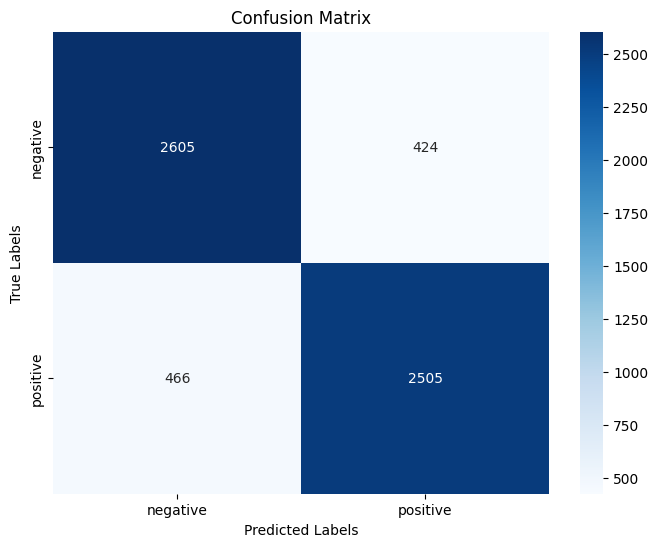

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk


# Load IMDB Dataset
def load_imdb_data():
    #IMDB reviews dataset is a CSV with columns "review" and "sentiment" dataset
    temp_df = pd.read_csv('/content/IMDB Dataset.csv')
    df = temp_df.iloc[:30000]
    return df['review'], df['sentiment']

# Tokenization
def tokenize_reviews(reviews):
    return [word_tokenize(review.lower()) for review in reviews]

# Stopword Removal
def remove_stopwords(tokenized_reviews):
    stop_words = set(stopwords.words('english'))
    return [
        [word for word in review if word not in stop_words]
        for review in tokenized_reviews
    ]

# Lemmatization
def lemmatize_reviews(tokenized_reviews):
    lemmatizer = WordNetLemmatizer()
    return [
        [lemmatizer.lemmatize(word) for word in review]
        for review in tokenized_reviews
    ]

# Join tokenized words back into a single string
def detokenize_reviews(processed_reviews):
    return [' '.join(review) for review in processed_reviews]

# Main Preprocessing Function
def preprocess_reviews(reviews):
    tokenized = tokenize_reviews(reviews)
    no_stopwords = remove_stopwords(tokenized)
    lemmatized = lemmatize_reviews(no_stopwords)
    return detokenize_reviews(lemmatized)

# Function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Train and Evaluate ML Models
def train_and_evaluate(reviews, sentiments):
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(reviews, sentiments, test_size=0.2, random_state=42)

    # Convert text data to TF-IDF features
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Create and train the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_tfidf, y_train)

    # Predict and evaluate
    y_pred = rf_model.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, labels=np.unique(sentiments))

# Main Execution
if __name__ == "__main__":
    reviews, sentiments = load_imdb_data()

    # Preprocess the reviews
    processed_reviews = preprocess_reviews(reviews)

    # Train and evaluate the models
    train_and_evaluate(processed_reviews, sentiments)
